In [1]:
import numpy as np
import cpnest.model
import corner
import pandas as pd
import matplotlib.pyplot as plt

Checkpoint exception raise


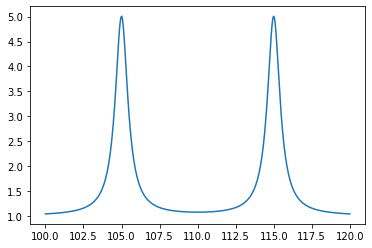

In [2]:
npts = 400
f = np.linspace(100, 120, npts)
nu = [105.0, 115.0]
height = 1.0
lw = 1.0
lim = height / ((lw/2.0)**2 + (nu[0] - f)**2) + 1.0
lim += height / ((lw/2.0)**2 + (nu[1] - f)**2)

plt.plot(f, lim)

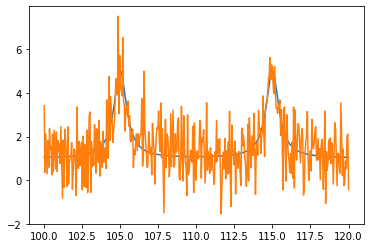

In [3]:
p = lim + np.random.randn(npts)

plt.plot(f, lim)
plt.plot(f, p)

In [22]:
class SimpleModel(cpnest.model.Model):
    """
    A simple Lorentzian model
    """
    def __init__(self, f, p):
        self.names=['nu', 'h', 'lw']
        self.bounds=[[100,120],[0, 100], [0,10]]
        self.set_frequency(f)
        self.set_power(p)
    
    def set_frequency(self, f):
        self.f = f
        
    def set_power(self, p):
        self.p = p
    
    def model(self, param):
        return param['h'] / ((param['lw']/2.0)**2 + (param['nu'] - self.f)**2) + 1.0
    
    def log_likelihood(self, param):
        resid = self.model(param) - self.p
        return np.sum(-0.5*(resid**2) - np.log(2.0*np.pi))
    
    def log_prior(self,p):
        if not self.in_bounds(p): return -np.inf
        x = p.values[0]
        return 0.0
    
    def __call__(self):
        self.nest = cpnest.CPNest(self, seed=54, nthreads=4, nlive=1000, maxmcmc=100, 
                     poolsize=100)
        self.nest.run()

In [23]:
%%time
mymodel = SimpleModel(f, p)
mymodel()

2020-03-18, 11:46:15 - CPNest  : Running with 4 parallel threads
2020-03-18, 11:46:30 - CPNest  : Sampler process 15157: MCMC samples accumulated = 0
2020-03-18, 11:46:30 - CPNest  : Sampler process 15159: MCMC samples accumulated = 0
2020-03-18, 11:46:30 - CPNest  : Sampler process 15156: MCMC samples accumulated = 0
2020-03-18, 11:46:30 - CPNest  : Sampler process 15158: MCMC samples accumulated = 0
2020-03-18, 11:46:30 - CPNest  : Sampler process 15156 - mean acceptance 0.346: exiting
2020-03-18, 11:46:30 - CPNest  : Sampler process 15159 - mean acceptance 0.348: exiting
2020-03-18, 11:46:30 - CPNest  : Sampler process 15157 - mean acceptance 0.373: exiting
2020-03-18, 11:46:30 - CPNest  : Sampler process 15158 - mean acceptance 0.358: exiting
2020-03-18, 11:46:30 - CPNest  : Final evidence: -1072.38
2020-03-18, 11:46:30 - CPNest  : Information: 12.87
2020-03-18, 11:46:31 - CPNest  : Computed log_evidences: (-1072.3828485048662,)
2020-03-18, 11:46:31 - CPNest  : Relative weights of 

CPU times: user 4.44 s, sys: 299 ms, total: 4.73 s
Wall time: 16 s


In [18]:
import pandas as pd
df = pd.DataFrame(nest.get_posterior_samples())
df.head()

2020-03-18, 11:08:01 - CPNest  : Computed log_evidences: (-1072.3366716115913,)
2020-03-18, 11:08:01 - CPNest  : Relative weights of input files: [1.0]
2020-03-18, 11:08:01 - CPNest  : Relative weights of input files taking into account their length: [1.0]
2020-03-18, 11:08:01 - CPNest  : Number of input samples: [17976]
2020-03-18, 11:08:01 - CPNest  : Expected number of samples from each input file [3726]
2020-03-18, 11:08:01 - CPNest  : Samples produced: 3726


,nu,h,lw,logL,logPrior
0,105.054924,3.649369,2.314478,-1068.563330,0.0
1,104.780432,1.157569,1.288897,-1068.306937,0.0
2,104.909418,2.974769,2.194595,-1067.358622,0.0
3,105.229478,1.348636,1.296806,-1067.177661,0.0
4,104.836112,1.689157,1.656834,-1067.173776,0.0


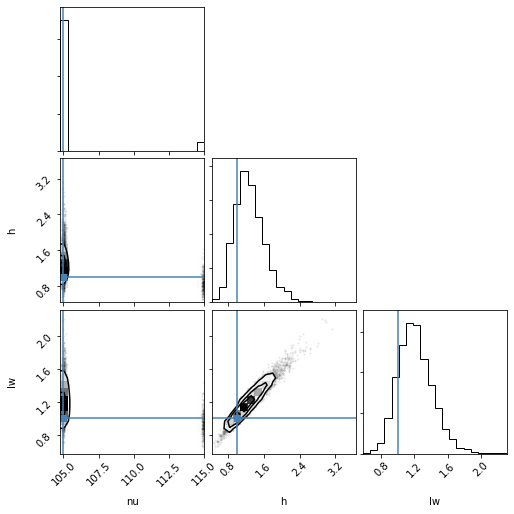

In [19]:
import corner 
corner.corner(df[['nu', 'h', 'lw']], truths=[nu[0], height, lw]);